In [1]:
""""
Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.
"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix,classification_report

df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data",
                names = ["Class", "Age", "Menopause", "Tumor size", "Inv-nodes", "Node-caps", "Deg-Malig", "Breast", "Breast quad", "Irridiat"])

In [2]:
df.head(10)

,Class,Age,Menopause,Tumor size,Inv-nodes,Node-caps,Deg-Malig,Breast,Breast quad,Irridiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [3]:
df.dtypes

Class          object
Age            object
Menopause      object
Tumor size     object
Inv-nodes      object
Node-caps      object
Deg-Malig       int64
Breast         object
Breast quad    object
Irridiat       object
dtype: object

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[50.          2.07291667]
 [40.          2.06666667]
 [30.          2.13888889]
 [60.          1.98245614]
 [70.          1.5       ]
 [20.          2.        ]]


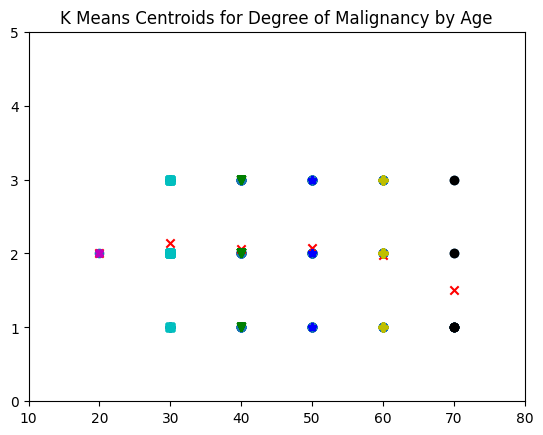

The SSE is 154.16683443581633


In [87]:
#Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points)
df = df.dropna() #Upates the df after dropping all NaN values
k_np = df.to_numpy()    #Creates a numpy array out of the df
Age = [row[1] for row in k_np]  #Creates an array from the Age column
Degree = [row[6] for row in k_np]    #Creates an array from the Deg_Malig column
Age = np.char.replace(Age, "20-29", "20")   #Reformatting data so that it is not in a Age range. These will be labeled in the plot
Age = np.char.replace(Age, "30-39", "30")
Age = np.char.replace(Age, "40-49", "40")
Age = np.char.replace(Age, "50-59", "50")
Age = np.char.replace(Age, "60-69", "60")
Age = np.char.replace(Age, "70-79", "70")
Age = Age.astype(int)#Recast data as int
X = np.dstack((Age, Degree)).reshape(len(Age), 2)   #Creates a 2d function of the dataset
colors = ['b', 'g', 'c', 'y', 'k', 'm']    #colors for the different clusters
markers = ['*', 'v', 's', 'P', 'o', 'X']    #markers for the different clusters
#print(X)
plt.scatter(Age, Degree)     #Creates scatter plot
plt.show
K = 6    #There are 6 clusters. Because the ranges were reduced to their tens place, there is not variation in the data and points are on top of eachother. Age needs to be disagregated
kmeans_model = KMeans(n_clusters=K, random_state = 5).fit(X)    #calculates the 
#kmeans_model.
print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('K Means Centroids for Degree of Malignancy by Age')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(Age[i], Degree[i], color=colors[l], marker=markers[l])
    plt.xlim([10,80])
    plt.ylim([0,5])
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

#Calculate the sum of least square error for each different values of 'k'

coefs = np.polyfit(Age, Degree, 1)
yfit = np.polyval(coefs, Age)
SSE = np.sum((Degree-yfit)**2)
print('The SSE is', SSE)

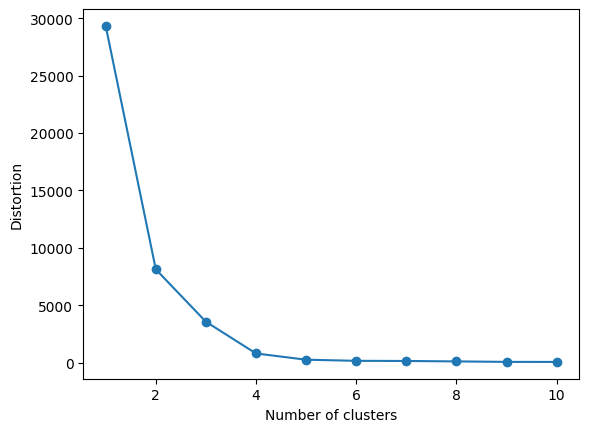

According the elbow method, there appears to be 3 clusters instead of 6. Because the data are not disaggregated (they came as ranges instead of singular datapoints), it is difficult to determine an accurate cluster but by the ranges, there appear to only be 3 clusters.


In [83]:
#Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points)
distortions = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
print('According the elbow method, there appears to be 3 clusters instead of 6. Because the data are not disaggregated (they came as ranges instead of singular datapoints), it is difficult to determine an accurate cluster but by the ranges, there appear to only be 3 clusters.')
    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[37.00787402  2.08661417]
 [60.95238095  1.93650794]
 [50.          2.07291667]]


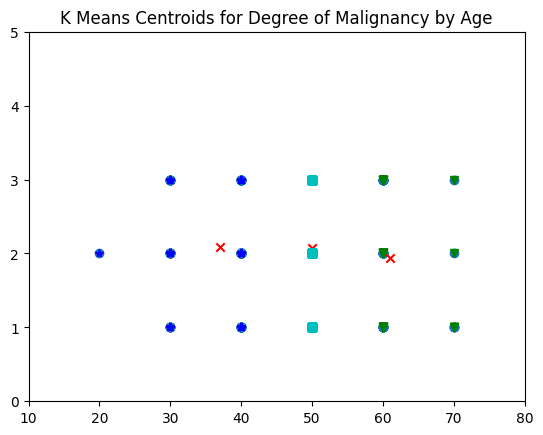

The distribution of K is less varied between the updated centroids. It is fair to say that this clustering is more precise.


In [90]:
#Finally plot the optimal clusters with their centroids along with a brief explanation (50 points).
plt.scatter(Age, Degree)     #Creates scatter plot
plt.show
K = 3    #3 clusters per the elbow method. Because the ranges were reduced to their tens place, there is not variation in the data and points are on top of eachother. Age needs to be disagregated
kmeans_model = KMeans(n_clusters=K, random_state = 5).fit(X)    #calculates the 
#kmeans_model.
print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('K Means Centroids for Degree of Malignancy by Age')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(Age[i], Degree[i], color=colors[l], marker=markers[l])
    plt.xlim([10,80])
    plt.ylim([0,5])
    
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()


print('The distribution of K is less varied between the updated centroids. It is fair to say that this clustering is more precise.')